# project munging

I gave up on doing my other idea in time

Lets look at the weather. Berkeley Earth has made a nice clean data set available

Kaggle data: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/downloads/GlobalLandTemperatures.zip

Raw Data: http://berkeleyearth.org/data/

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

#plotly has some nice maps
import plotly.offline as py
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

# Global Temperatures

In [4]:
global_temp = pd.read_csv('../GlobalTemperatures.csv')

In [5]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# make times
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

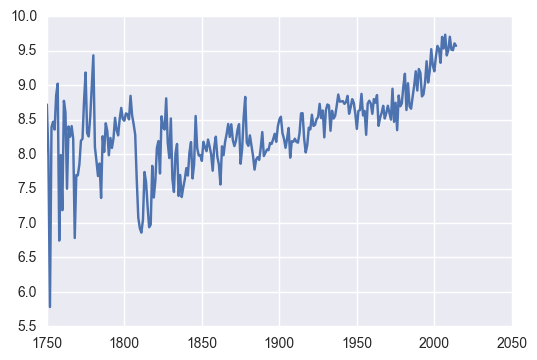

In [23]:
# graph temp globally over time

years = range(global_temp.year.min(), global_temp.year.max())
yearly_means = []

for year in years:
    mean = global_temp[global_temp.year == year].LandAverageTemperature.mean()
    yearly_means.append(mean)
    
plt.plot(years, yearly_means)

(1750, 2015)

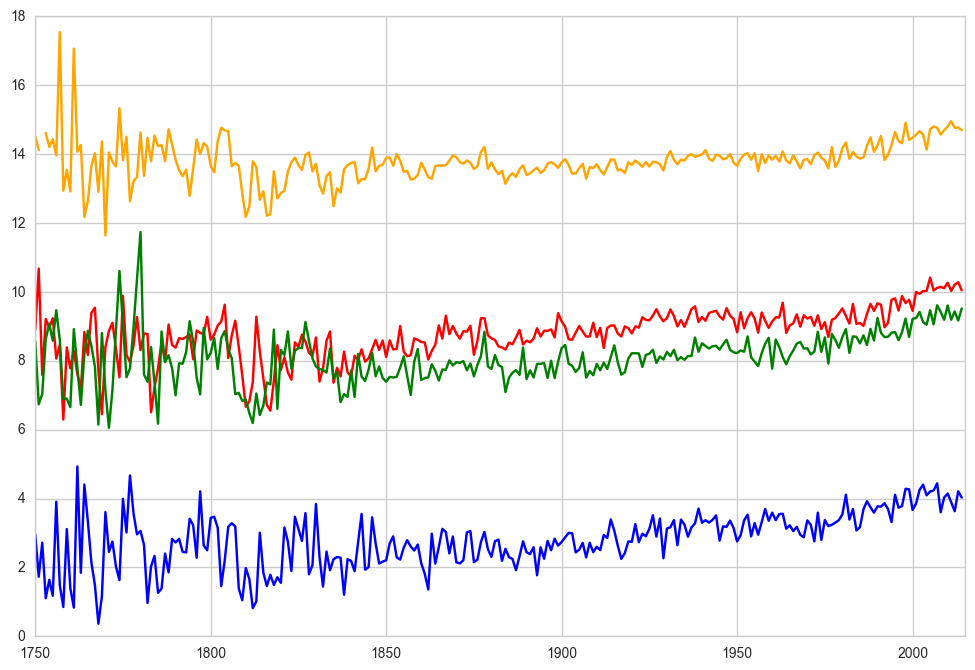

In [32]:
# what about seasonally

def make_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
global_temp['season'] = global_temp['month'].apply(make_season)

# season : color
seasons = {
    'summer': 'orange',
    'autumn': 'r',
    'spring': 'g',
    'winter': 'b'
}

f, ax = plt.subplots(figsize=(12, 8))

for season, color in seasons.iteritems():
    season_temps = []
    for year in years:
        season_temps.append(global_temp[(global_temp.season == season) & (global_temp.year == year)].LandAverageTemperature.mean())
    plt.plot(years, season_temps, color=color)

plt.xlim(global_temp.year.min(), global_temp.year.max())

### uncertainty - drops over time

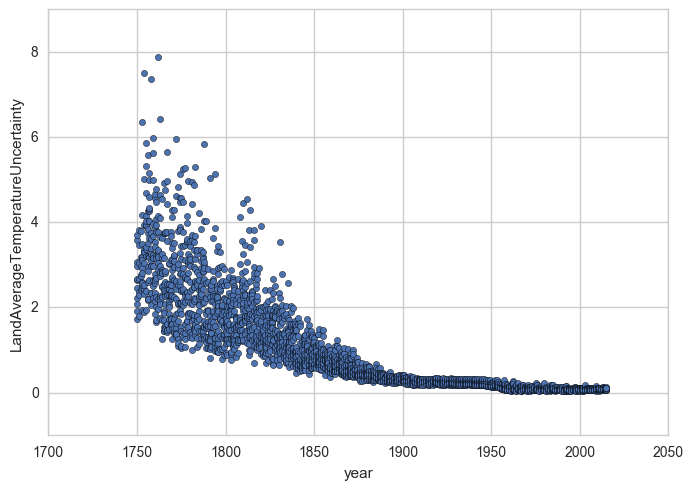

In [36]:
global_temp.plot(kind='scatter', x='year', y='LandAverageTemperatureUncertainty')